<a href="https://colab.research.google.com/github/dkazi/deep-learning/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
import sys
print("Python version:", sys.version)


TensorFlow version: 2.18.0
NumPy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [9]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [10]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [11]:
rows = 5
digits_per_row = 5

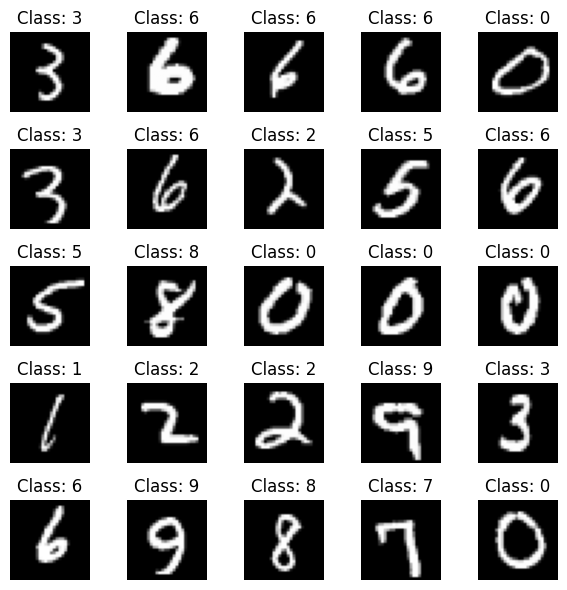

In [12]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [13]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [14]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5776 - loss: 1.3580 - val_accuracy: 0.8644 - val_loss: 0.5102
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8700 - loss: 0.4815 - val_accuracy: 0.8958 - val_loss: 0.3846
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8967 - loss: 0.3773 - val_accuracy: 0.9058 - val_loss: 0.3306
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9084 - loss: 0.3272 - val_accuracy: 0.9141 - val_loss: 0.3008
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9176 - loss: 0.2953 - val_accuracy: 0.9194 - val_loss: 0.2784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9220 - loss: 0.2731 - val_accuracy: 0.9247 - val_loss: 0.2660
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9274 - loss: 0.2549 - val_accuracy: 0.9284 - val_loss: 0.2479
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9312 - loss: 0.

# Display Loss and Accuracy per Training Epoch

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

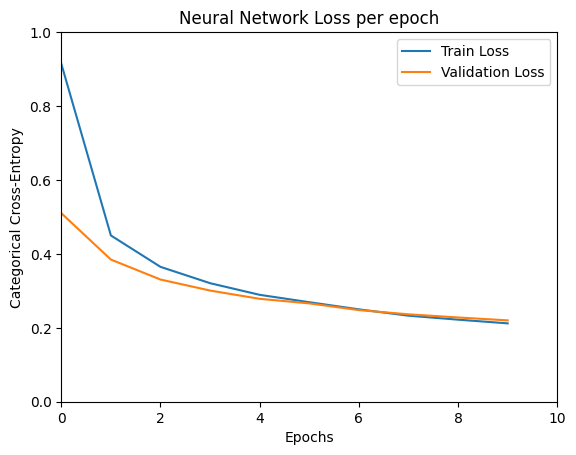

In [18]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

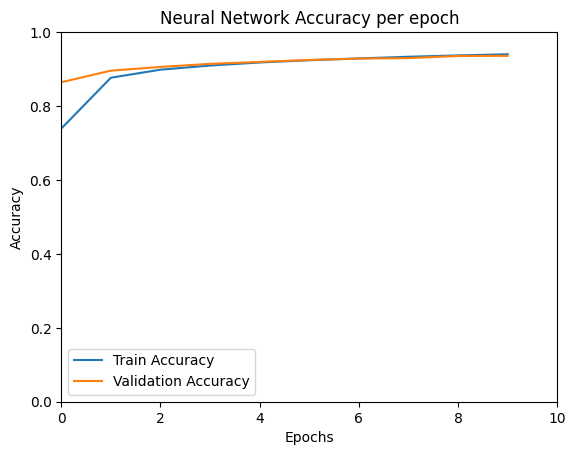

In [19]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


In [20]:
def model_function(units, layers, activation, lr):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,)))
    for _ in range(layers):
        model.add(tf.keras.layers.Dense(units, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Παραδείγματα δοκιμών
examples = [
    {'units': 256, 'layers': 3, 'activation': 'relu', 'lr': 0.001},
    {'units': 256, 'layers': 4, 'activation': 'tanh', 'lr': 0.002},
    {'units': 512, 'layers': 2, 'activation': 'tanh', 'lr': 0.0005}]
results = []

for ex in examples:
    trained_model = model_function(**ex)
    hist = trained_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
    acc = hist.history['val_accuracy'][-1]
    results.append((ex, acc))
    print(f"{ex} => Accuracy: {acc:.4f}")
print("Παρατηρώ ότι το επίπεδο των νευρώνων παίζει σημαντικό ρόλο στην ακρίβεια.")
print("Παρόλο που στην 3η περίπτωση έχω 512 νευρώνες σε κάθε επίπεδο, έχουμε λιγότερη ακρίβεια λόγω των λιγότερων επιπέδων.")
print("Σε αυτό συμβάλλει και ο μικρότερος ρυθμός μάθησης που δεν επιτρέπει στο δίκτυο να μαθαίνει γρήγορα.")
print("Στην 2η περίπτωση παρόλο που έχουμε περισσότερα επίπεδα, δεν έχουμε μεγαλύτερη ακρίβεια σε σχέση με την 1η")
print("Αυτό οφείλεται στην διαφορετική συνάρτηση ενεργοποίησης και τον ρυθμό μάθησης.")
print("Ο συνδυασμός της relu με έναν ιδανικό ρυθμό μάθησης, ο οποίος θα είναι σταθερός και θα μαθαίνει γρήγορα, δίνει καλύτερα αποτελέσματα στην 1η περίπτωση.")

{'units': 256, 'layers': 3, 'activation': 'relu', 'lr': 0.001} => Accuracy: 0.9532
{'units': 256, 'layers': 4, 'activation': 'tanh', 'lr': 0.002} => Accuracy: 0.9364
{'units': 512, 'layers': 2, 'activation': 'tanh', 'lr': 0.0005} => Accuracy: 0.9296
Παρατηρώ ότι το επίπεδο των νευρώνων παίζει σημαντικό ρόλο στην ακρίβεια.
Παρόλο που στην 3η περίπτωση έχω 512 νευρώνες σε κάθε επίπεδο, έχουμε λιγότερη ακρίβεια λόγω των λιγότερων επιπέδων.
Σε αυτό συμβάλλει και ο μικρότερος ρυθμός μάθησης που δεν επιτρέπει στο δίκτυο να μαθαίνει γρήγορα.
Στην 2η περίπτωση παρόλο που έχουμε περισσότερα επίπεδα, δεν έχουμε μεγαλύτερη ακρίβεια σε σχέση με την 1η
Αυτό οφείλεται στην διαφορετική συνάρτηση ενεργοποίησης και τον ρυθμό μάθησης.
Ο συνδυασμός της relu με έναν ιδανικό ρυθμό μάθησης, ο οποίος θα είναι σταθερός και θα μαθαίνει γρήγορα, δίνει καλύτερα αποτελέσματα στην 1η περίπτωση.


## 2. Validation: Show 1 misclassified digit from each class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


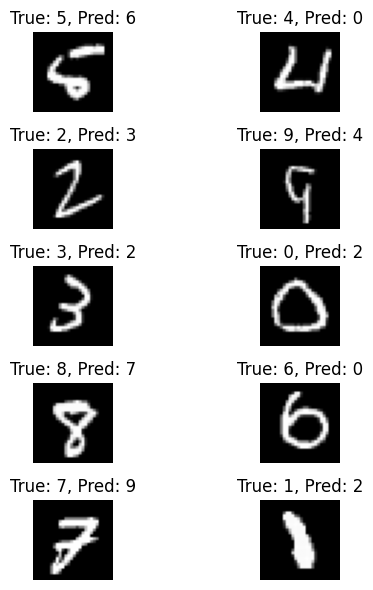

In [21]:
predictions = model.predict(x_test)
wrong = np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1)
wrong_x = np.where(wrong)[0]

classes = set()
plt.figure(figsize=(6, 6))
i = 0
for x in wrong_x:
    true_label = np.argmax(y_test[x])
    pred_label = np.argmax(predictions[x])
    if true_label not in classes:
        classes.add(true_label)
        plt.subplot(5, 2, i+1)
        plt.imshow(x_test[x].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_label}, Pred: {pred_label}')
        plt.axis('off')
        i += 1
    if len(classes) == 10:
        break
plt.tight_layout()
plt.show()

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

In [22]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_dropout.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
print("Το dropout απενεργοποιεί τυχαία κάποιους νευρώνες και έτσι αποφεύγεται το overfitting.")
print("Με αυτόν τον τρόπο έχουμε ένα πιο σταθερό και ακριβές μοντέλο.")

print("Ερωτήσεις Κατανόησης:")
print("a. Το MNIST έχει πάρα πολλά δεδομένα που βοηθάνε το μοντέλο να μάθει καλά.")
print("b. Δεν είναι όλα τα pixels σημαντικά. Αυτά που είναι στο κέντρο έχουν περισσότερη πληροφορία από αυτά που είναι στην άκρη.")
print("c. Όταν έχουμε δύσκολα δεδομένα, όπως εικόνες, ήχος, κείμενο και είναι δύσκολο για το μοντέλο να αναπτυχθεί.")
print("d. Ναι, η Βαθιά Μάθηση μπορεί να χρησιμοποιηθεί και στους 3 κλάδους της Μηχανικής Μάθησης")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6948 - loss: 6.6689 - val_accuracy: 0.8845 - val_loss: 0.5102
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8326 - loss: 0.7287 - val_accuracy: 0.9138 - val_loss: 0.3753
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8690 - loss: 0.5480 - val_accuracy: 0.9230 - val_loss: 0.3095
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8887 - loss: 0.4547 - val_accuracy: 0.9312 - val_loss: 0.2815
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8955 - loss: 0.4082 - val_accuracy: 0.9360 - val_loss: 0.2571
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9055 - loss: 0.3696 - val_accuracy: 0.9408 - val_loss: 0.2554
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9169 - loss: 0.3192 - val_accuracy: 0.9422 - val_loss: 0.2393
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9170 - loss: 0

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [23]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
